mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, scikit-learn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 2.187 seconds
All requested packages already installed.


/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


X shape: (20640, 8) y shape: (20640,)
Model Accuracy (Test Score): 0.60
Test score: 0.83


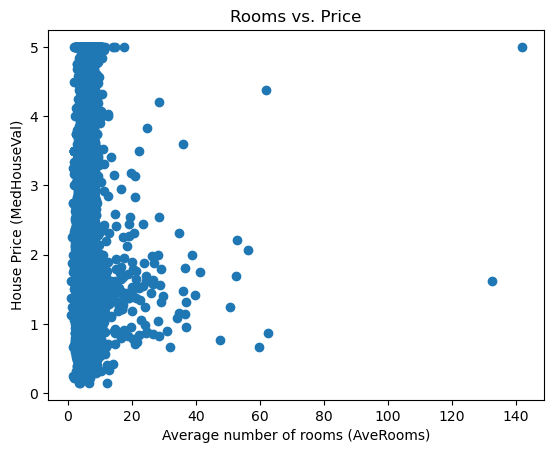

--- Model Evaluation ---
Mean Squared Error (MSE): 0.5558915986952448
R^2 Score: 0.5757877060324503
   AveRooms_bin_0  AveRooms_bin_1  AveRooms_bin_2  AveRooms_bin_3  \
0             1.0             0.0             0.0             0.0   
1             1.0             0.0             0.0             0.0   
2             1.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   AveRooms_bin_4  AveRooms_bin_5  AveRooms_bin_6  AveRooms_bin_7  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   AveRooms_bin_8  AveRooms_bin_9  
0             0.0             0.0 

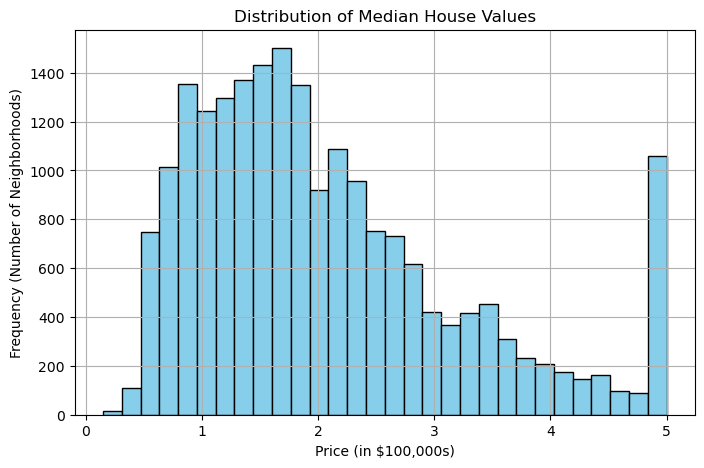

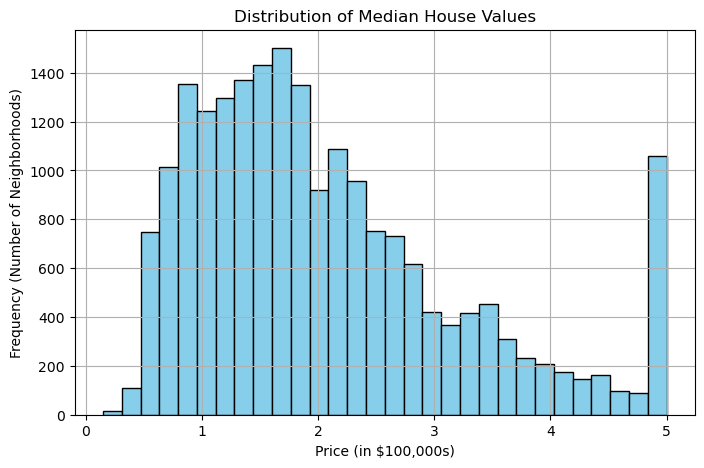

In [52]:
!mamba install pandas numpy matplotlib scikit-learn
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()
data_dummies = pd.DataFrame(data.data, columns=data.feature_names)
median_price = data.target.mean()
data_dummies['is_expensive'] = (data.target > median_price).astype(int)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df['HIGH_RM'] = (df['AveRooms'] > 6).astype(int)
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
rooms_binned = kb.fit_transform(df[['AveRooms']]) #
df_binned = pd.DataFrame( rooms_binned, columns=[f'AveRooms_bin_{i}' for i in range(10)],index=df.index)
df = pd.concat([df, df_binned], axis=1)
X = features.values
y = data_dummies['is_expensive'].values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
logreg.fit(X_train, y_train)
accuracy = logreg.score(X_test_scaled, y_test)
print(f"X shape: {X.shape} y shape: {y.shape}")
print(f"Model Accuracy (Test Score): {accuracy:.2f}")
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))
import pandas as pd
import matplotlib.pyplot as plt
data = fetch_california_housing()
data_dummies = pd.DataFrame(data.data, columns=data.feature_names)
df = pd.DataFrame(data.data, columns=data.feature_names)
features = data_dummies.loc[:, 'MedInc':'Longitude'] 
data_dummies.head()
df['MedHouseVal'] = data.target
df.head()
df.describe()
df.isnull().sum()
plt.scatter(df['AveRooms'], df['MedHouseVal'])
plt.xlabel('Average number of rooms (AveRooms)')
plt.ylabel('House Price (MedHouseVal)')
plt.title('Rooms vs. Price')
plt.show()
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(8, 5))
df['MedHouseVal'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Price (in $100,000s)')
plt.ylabel('Frequency (Number of Neighborhoods)')
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("--- Model Evaluation ---")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
df['HIGH_RM'] = (df['AveRooms'] > 6).astype(int)
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
rooms_binned = kb.fit_transform(df[['AveRooms']])
print(df_binned.head())
df_binned = pd.DataFrame(rooms_binned, columns=[f'AveRooms_bin_{i}' for i in range(10)])
df = pd.concat([df, df_binned], axis=1)        
print("--- New Binary Feature: High Number of Rooms ---")
print(df[['AveRooms', 'HIGH_RM']].head())
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']                                                                          
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(8, 5))
df['MedHouseVal'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Median House Values')
plt.xlabel('Price (in $100,000s)')
plt.ylabel('Frequency (Number of Neighborhoods)')
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("--- Model Evaluation ---")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
df['HIGH_RM'] = (df['AveRooms'] > 6).astype(int)
print("--- New Binary Feature: High Number of Rooms ---")
print(df[['AveRooms', 'HIGH_RM']].head())

